### Chahat Agarwal
## Task 1: Data Cleaning & Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("C:/Users/chaha/Downloads/Titanic-Dataset.csv")

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 66.3 KB
None


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print(df.head())

   PassengerId  Survived    Pclass  Name  Sex       Age     SibSp     Parch  \
0    -1.730108 -0.789272  0.827377   108    1 -0.592481  0.432793 -0.473674   
1    -1.726220  1.266990 -1.566107   190    0  0.638789  0.432793 -0.473674   
2    -1.722332  1.266990  0.827377   353    0 -0.284663 -0.474545 -0.473674   
3    -1.718444  1.266990 -1.566107   272    0  0.407926  0.432793 -0.473674   
4    -1.714556 -0.789272  0.827377    15    1  0.407926 -0.474545 -0.473674   

   Ticket      Fare  Cabin  Embarked  
0     523 -0.502445     47         2  
1     596  0.786845     81         0  
2     669 -0.488854     47         2  
3      49  0.420730     55         2  
4     472 -0.486337     47         2  


In [26]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print(df[num_cols].head())

   PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
0    -1.730108 -0.789272  0.827377 -0.592481  0.432793 -0.473674 -0.502445
1    -1.726220  1.266990 -1.566107  0.638789  0.432793 -0.473674  0.786845
2    -1.722332  1.266990  0.827377 -0.284663 -0.474545 -0.473674 -0.488854
3    -1.718444  1.266990 -1.566107  0.407926  0.432793 -0.473674  0.420730
4    -1.714556 -0.789272  0.827377  0.407926 -0.474545 -0.473674 -0.486337


In [43]:
mean_values = df[['Age', 'Fare', 'SibSp', 'Parch']].mean()
median_values = df[['Age', 'Fare', 'SibSp', 'Parch']].median()
mode_values = df[['Age', 'Fare', 'SibSp', 'Parch']].mode().iloc[0]

In [40]:
print(mean_values)

Age      3.987333e-18
Fare     3.987333e-18
SibSp    1.594933e-17
Parch   -7.077516e-17
dtype: float64


In [39]:
print(median_values)

Age     -1.874046e-16
Fare    -3.573909e-01
SibSp   -4.745452e-01
Parch   -4.736736e-01
dtype: float64


In [38]:
print(mode_values)

Age     -1.874046e-16
Fare    -4.863374e-01
SibSp   -4.745452e-01
Parch   -4.736736e-01
Name: 0, dtype: float64


In [41]:
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df[numerical_cols].head())

        Age      Fare     SibSp     Parch
0 -0.592481 -0.502445  0.432793 -0.473674
1  0.638789  0.786845  0.432793 -0.473674
2 -0.284663 -0.488854 -0.474545 -0.473674
3  0.407926  0.420730  0.432793 -0.473674
4  0.407926 -0.486337 -0.474545 -0.473674


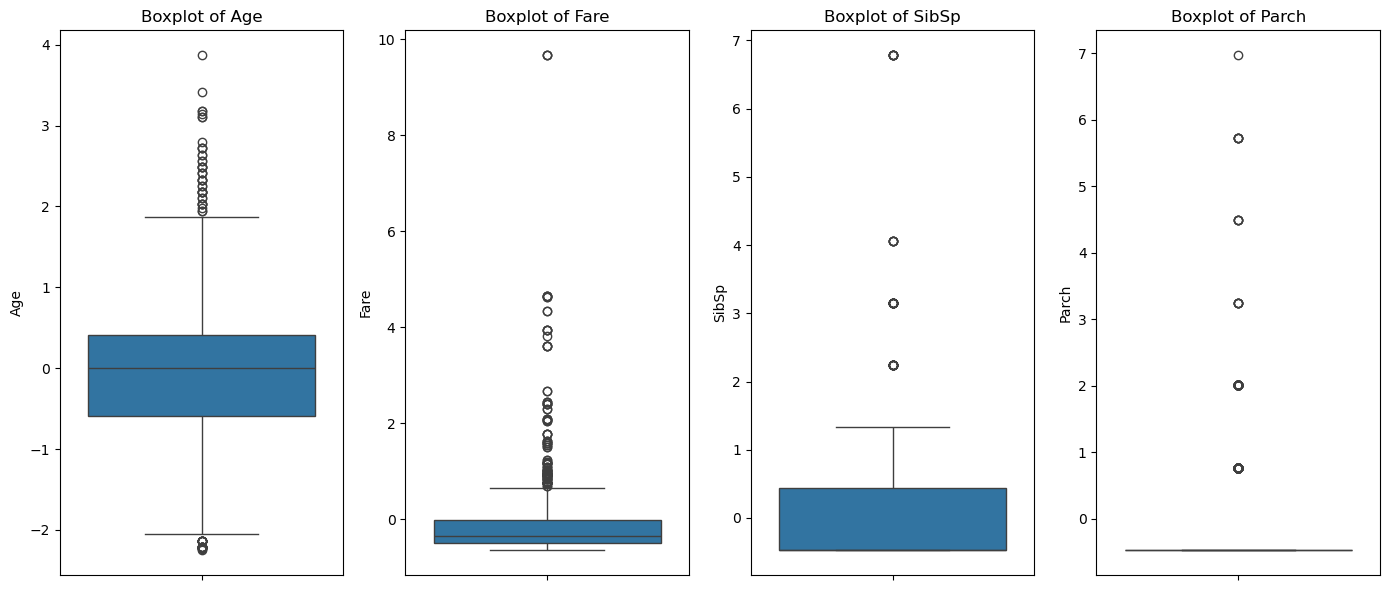

In [42]:
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
plt.figure(figsize=(14, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [46]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df_cleaned = remove_outliers(df, numerical_cols)
df_cleaned.shape

(577, 12)